<a href="https://colab.research.google.com/github/Rawan2266/Prodigy-InfoTech/blob/main/Task_4_prodigy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('sunpos.csv')

In [5]:
df.head()

,ID,azimuth,altitude
0,A-1,354.238573,-65.042710
1,A-2,93.330749,-20.068076
2,A-3,96.263545,-16.643310
3,A-4,103.250149,-7.915227
4,A-5,111.281535,1.799698


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161319 entries, 0 to 161318
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ID        161319 non-null  object 
 1   azimuth   161319 non-null  float64
 2   altitude  161318 non-null  float64
dtypes: float64(2), object(1)
memory usage: 3.7+ MB


In [10]:
print("Columns:", df.columns.tolist()[:30], '...')

Columns: ['ID', 'azimuth', 'altitude'] ...


In [11]:
df['altitude'] = pd.to_numeric(df['altitude'], errors='coerce')
df['azimuth'] = pd.to_numeric(df['azimuth'], errors='coerce')

In [18]:
def categorize_altitude(alt):
    if pd.isna(alt):
        return 'Unknown'
    if alt < 0:
        return 'Night'
    elif alt < 15:
        return 'Sunrise/Sunset'
    else:
        return 'Daytime'
df['time_of_day'] = df['altitude'].apply(categorize_altitude)


In [19]:
df.head()

,ID,azimuth,altitude,time_of_day
0,A-1,354.238573,-65.042710,Night
1,A-2,93.330749,-20.068076,Night
2,A-3,96.263545,-16.643310,Night
3,A-4,103.250149,-7.915227,Night
4,A-5,111.281535,1.799698,Sunrise/Sunset


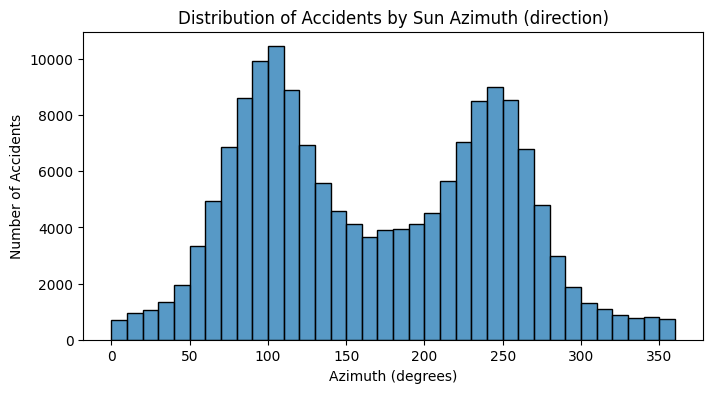

In [23]:
def plot_azimuth_distribution(df):
    plt.figure(figsize=(8,4))
    sn.histplot(df['azimuth'].dropna(), bins=36, kde=False)
    plt.title('Distribution of Accidents by Sun Azimuth (direction)')
    plt.xlabel('Azimuth (degrees)')
    plt.ylabel('Number of Accidents')
    plt.show()
plot_azimuth_distribution(df)

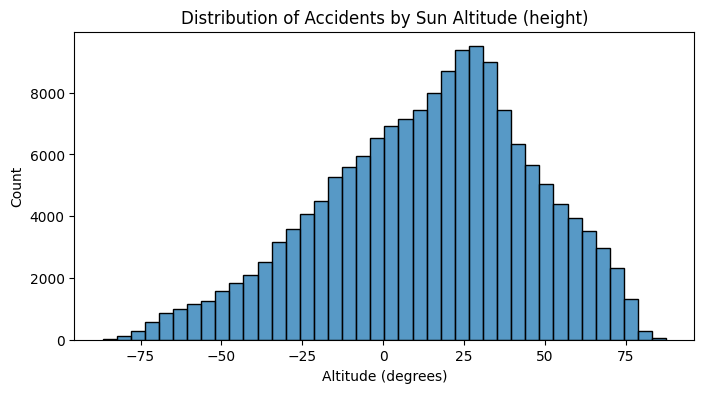

In [24]:
plt.figure(figsize=(8,4))
sn.histplot(df['altitude'].dropna(), bins=40, kde=False)
plt.title('Distribution of Accidents by Sun Altitude (height)')
plt.xlabel('Altitude (degrees)')
plt.show()

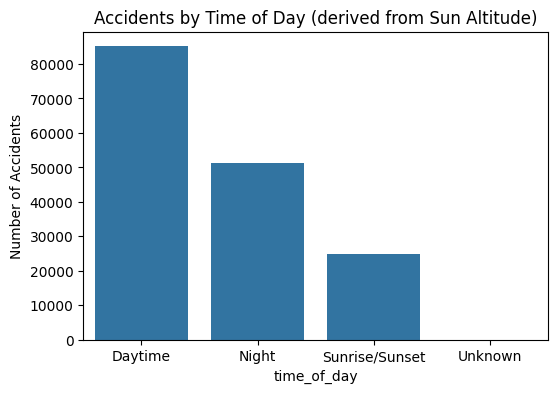

In [25]:
counts = df['time_of_day'].value_counts()
plt.figure(figsize=(6,4))
sn.barplot(x=counts.index, y=counts.values)
plt.title('Accidents by Time of Day (derived from Sun Altitude)')
plt.ylabel('Number of Accidents')
plt.show()